In [126]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [127]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full


,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [128]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [129]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [130]:
# Convert date to datetime
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

# Define the start and end dates
start_date = '2020-01-01'
end_date = '2022-10-31'

# Create a new dataframe by filtering the original dataframe
df_uk_2020_2022 = df_uk_full[(df_uk_full['Date'] >= start_date) & (df_uk_full['Date'] <= end_date)].copy()

#Check if the data types are right 
df_uk_2020_2022.dtypes

C:\Users\justi\AppData\Local\Temp\ipykernel_41404\3064471974.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)


Date                                       datetime64[ns]
ftse_250_price                                    float64
ftse_250_total_return                             float64
base_rate                                         float64
CPI                                               float64
ftse_350_Price                                    float64
ftse_350_Total Return (Gross, Unhedged)           float64
price_02_Price                                    float64
price_02_Total Return (Gross, Unhedged)           float64
confidence_score                                  float64
price_05_Price                                    float64
price_05_Total Return (Gross, Unhedged)           float64
price_10_Price                                    float64
price_10_Total Return (Gross, Unhedged)           float64
unemployment_rate                                 float64
wage_growth_rate                                  float64
gdp_GDP                                           float64
polarity_score

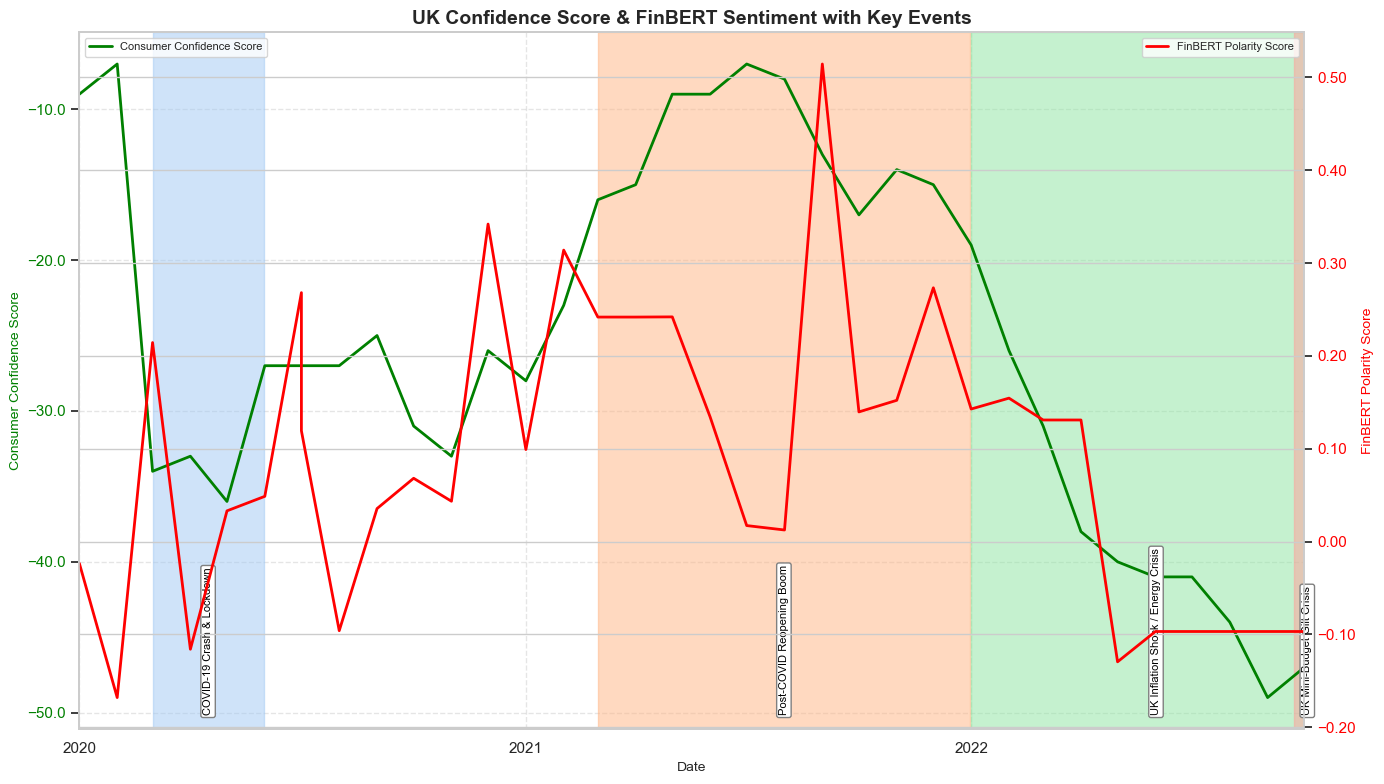

In [131]:
# Filter data from 1 Jan 2020 onwards
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2022-10-31')
df_plot = df_uk_2020_2022[
    (df_uk_2020_2022['Date'] >= start_date) & (df_uk_2020_2022['Date'] <= end_date)
].copy()
df_plot = df_plot.dropna(subset=['confidence_score', 'polarity_score_finbert'])

# Define the key economic events dictionary
events = {
    'Early 1990s Recession (UK)': {'Start': '1990-07-01', 'End': '1992-09-30'},
    'Black Wednesday (ERM Crisis)': {'Start': '1992-09-16', 'End': '1992-09-16'},
    'BoE Operational Independence': {'Start': '1997-05-06', 'End': '1997-05-06'},
    'Dot-com Bubble Burst': {'Start': '2000-03-01', 'End': '2002-10-31'},
    '9/11 Attacks': {'Start': '2001-09-11', 'End': '2001-09-11'},
    'Global Financial Crisis (GFC)': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Brothers Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
    'Brexit Referendum': {'Start': '2016-06-23', 'End': '2016-06-23'},
    'Brexit Negotiation Period': {'Start': '2016-07-01', 'End': '2019-12-31'},
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}
# Plot setup
sns.set_style('whitegrid')
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot confidence score (green)
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Consumer Confidence Score', color='green', fontsize=10)
ax1.plot(df_plot['Date'], df_plot['confidence_score'], color='green',
         label='Consumer Confidence Score', linewidth=2, markersize=4)
ax1.tick_params(axis='y', labelcolor='green')

# Plot sentiment score (red)
ax2 = ax1.twinx()
ax2.set_ylabel('FinBERT Polarity Score', color='red', fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color='red',
         label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor='red')

# Event shading and internal labels
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
for i, (event_name, dates) in enumerate(events.items()):
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])
    if end < start_date:
        continue
    display_start = max(start, start_date)
    display_end = min(end, end_date)
    ax1.axvspan(display_start, display_end, color=event_colors[i % len(event_colors)], alpha=0.5)

    label_x = display_start + (display_end - display_start) / 2
    ax1.text(label_x, 0.02, event_name, rotation=90, fontsize=8, color='black',
             ha='center', va='bottom', transform=ax1.get_xaxis_transform(),
             bbox=dict(facecolor='white', alpha=1, edgecolor='gray', boxstyle='round,pad=0.2'))

# Title and layout
plt.title('UK Confidence Score & FinBERT Sentiment with Key Events', fontsize=14, fontweight='bold')
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Set axis limits
ax1.set_xlim(start_date, end_date)
#ax1.set_ylim(df_plot['confidence_score'].min() - 1, df_plot['confidence_score'].max() + 1)
ax1.set_xlim(start_date, df_plot['Date'].max())
# Grid, legends, and show
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()

#### During the COVID-19 crash and lockdown, confidence dropped sharply and sentiment turned volatile. As the economy reopened, confidence steadily recovered, while sentiment remained more erratic and short-lived in its spikes. Notably, during the 2022 inflation and mini-budget crises, sentiment dropped into negative territory, yet consumer confidence continued to rise. This suggests that sentiment responds more immediately to policy shocks, while confidence reflects longer-term public outlook and resilience.

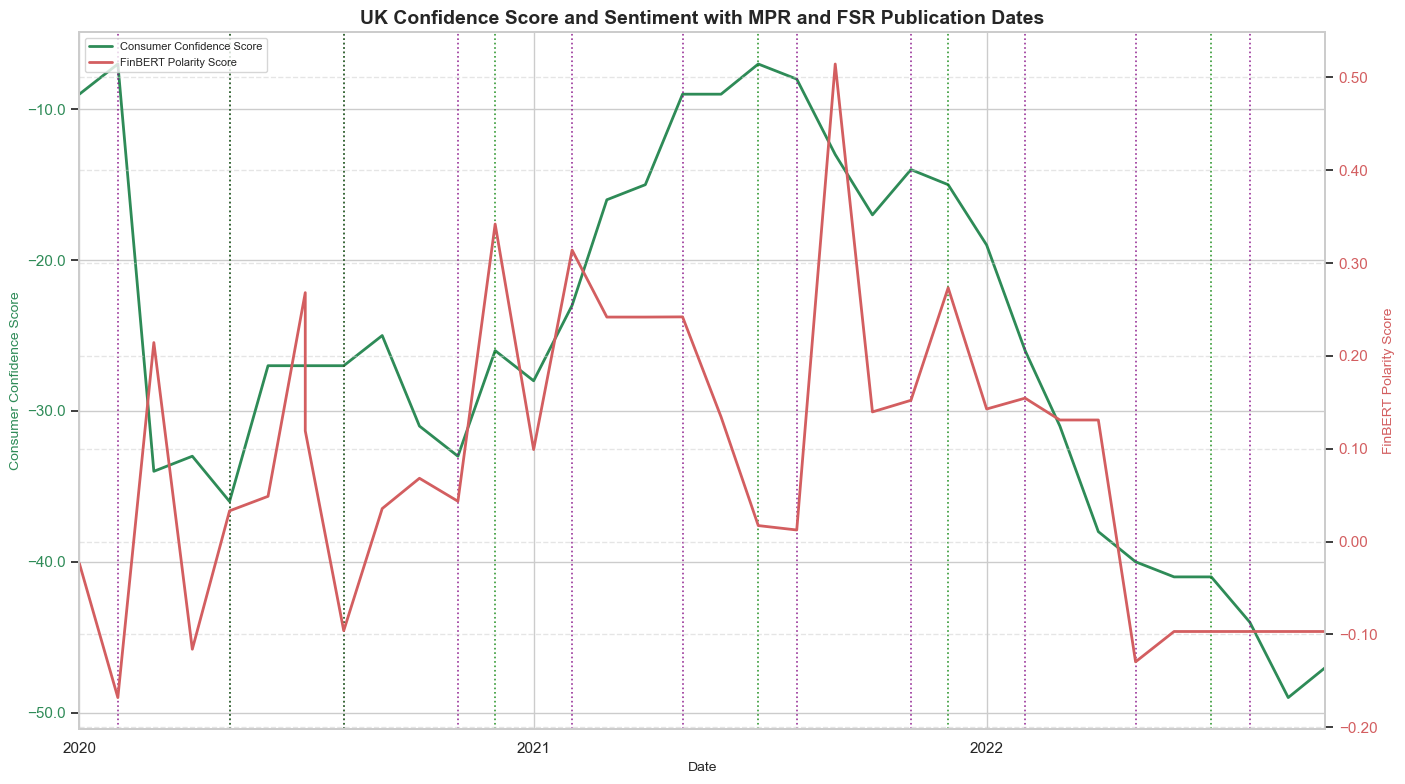

In [133]:
# Ensure your DataFrame is already loaded and called df_uk_2020_2022

start_date = pd.to_datetime('2020-01-01')
df_plot2 = df_uk_2020_2022[df_uk_2020_2022['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['confidence_score', 'polarity_score_finbert'])

# Load publication dates
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'
mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# Apply style
sns.set_style('whitegrid')

# Plot setup
fig, ax1 = plt.subplots(figsize=(14, 8))

# Confidence Score (Green Line)
color_conf = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Consumer Confidence Score', color=color_conf, fontsize=10)
line1, = ax1.plot(df_plot2['Date'], df_plot2['confidence_score'], color=color_conf, label='Consumer Confidence Score', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_conf)

# Sentiment Score (Red Line)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
line2, = ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment)

# Add vertical lines
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8)
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8)

# Title and layout
plt.title('UK Confidence Score and Sentiment with MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# X-axis formatting
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# Y-axis formatting
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Legends
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=8)

# Set X limits properly
ax1.set_xlim(start_date, df_plot2['Date'].max())

# Comment this out to avoid hiding the green line
# ax1.set_ylim(bottom=-0.5)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### Drop unncessary columns to reduce the number of variables to be explored

In [135]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_2020_2022.drop(['ftse_250_price', 'ftse_350_Price','ftse_350_Total Return (Gross, Unhedged)','price_02_Price', 'price_05_Price','price_05_Total Return (Gross, Unhedged)','price_10_Price','price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'base_rate', 'CPI',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'gdp_GDP',
       'polarity_score_finbert'],
      dtype='object')

#### Rename columns

In [137]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'BoE_base_rate', 'CPI_pct_change',
       '0-2yr_gilts_TReturns', 'confidence_score', 'unemployment_rate',
       'wage_growth_rate', 'GDP_pct_change', 'finbert_sentiment_score'],
      dtype='object')

In [138]:
# Define the new order of the columns
new_column_order = [
    'Date', 'confidence_score', 'finbert_sentiment_score', 'CPI_pct_change',
     'unemployment_rate','wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Reindex the DataFrame with the new column order
df_uk_focused = df_uk_focused[new_column_order]

df_uk_focused.head()

,Date,confidence_score,finbert_sentiment_score,CPI_pct_change,unemployment_rate,wage_growth_rate,GDP_pct_change,ftse_250_total_return,BoE_base_rate,0-2yr_gilts_TReturns
364,2020-01-01,-9.0,-0.023449,1.8,3.9,2.9,-2.7,16484.53341,0.235526,188.237
365,2020-02-01,-7.0,-0.167942,1.7,4.1,2.8,-2.7,15082.33282,0.205263,188.494
366,2020-03-01,-34.0,0.214355,1.5,4.1,2.2,-20.3,11804.71828,0.175000,189.074
367,2020-04-01,-33.0,-0.115880,0.8,4.1,0.9,-20.3,12892.18801,0.178571,189.179
368,2020-05-01,-36.0,0.033131,0.5,4.1,-0.4,-20.3,13365.07954,0.182143,189.223


### Correlation analysis

#### Create pairplot for visual correlation analysis

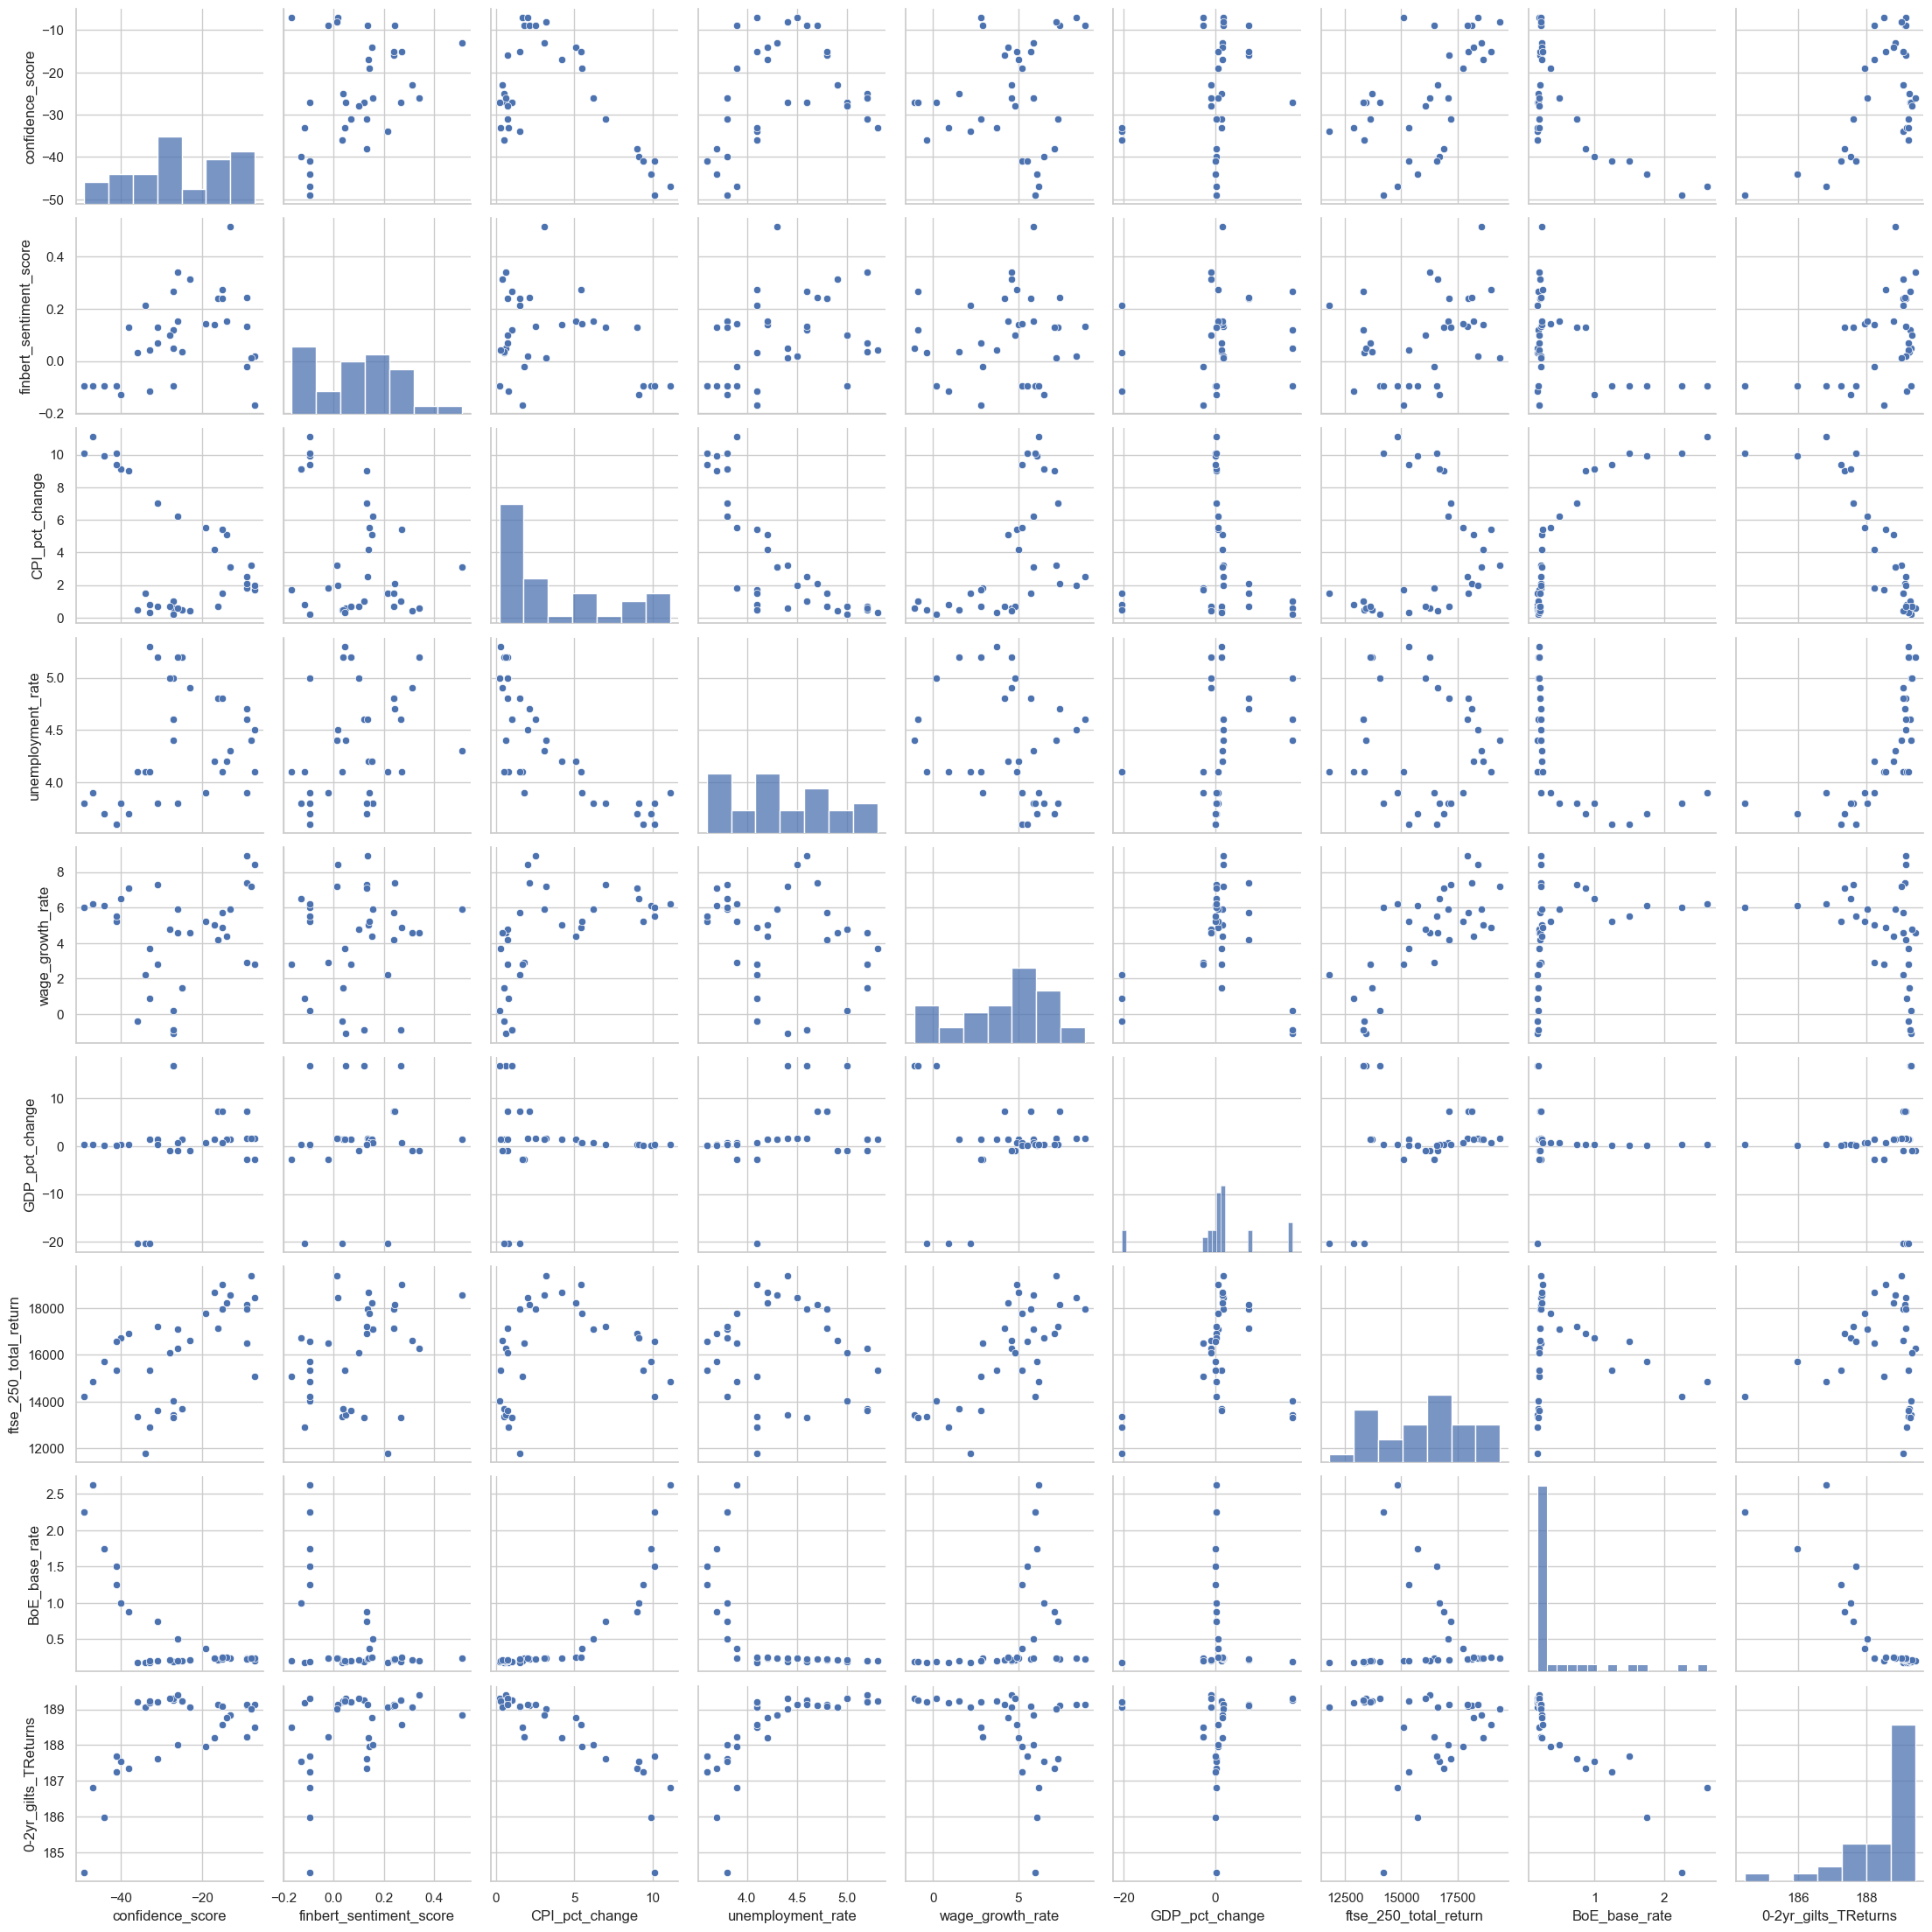

In [141]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

### Create correlation matrices

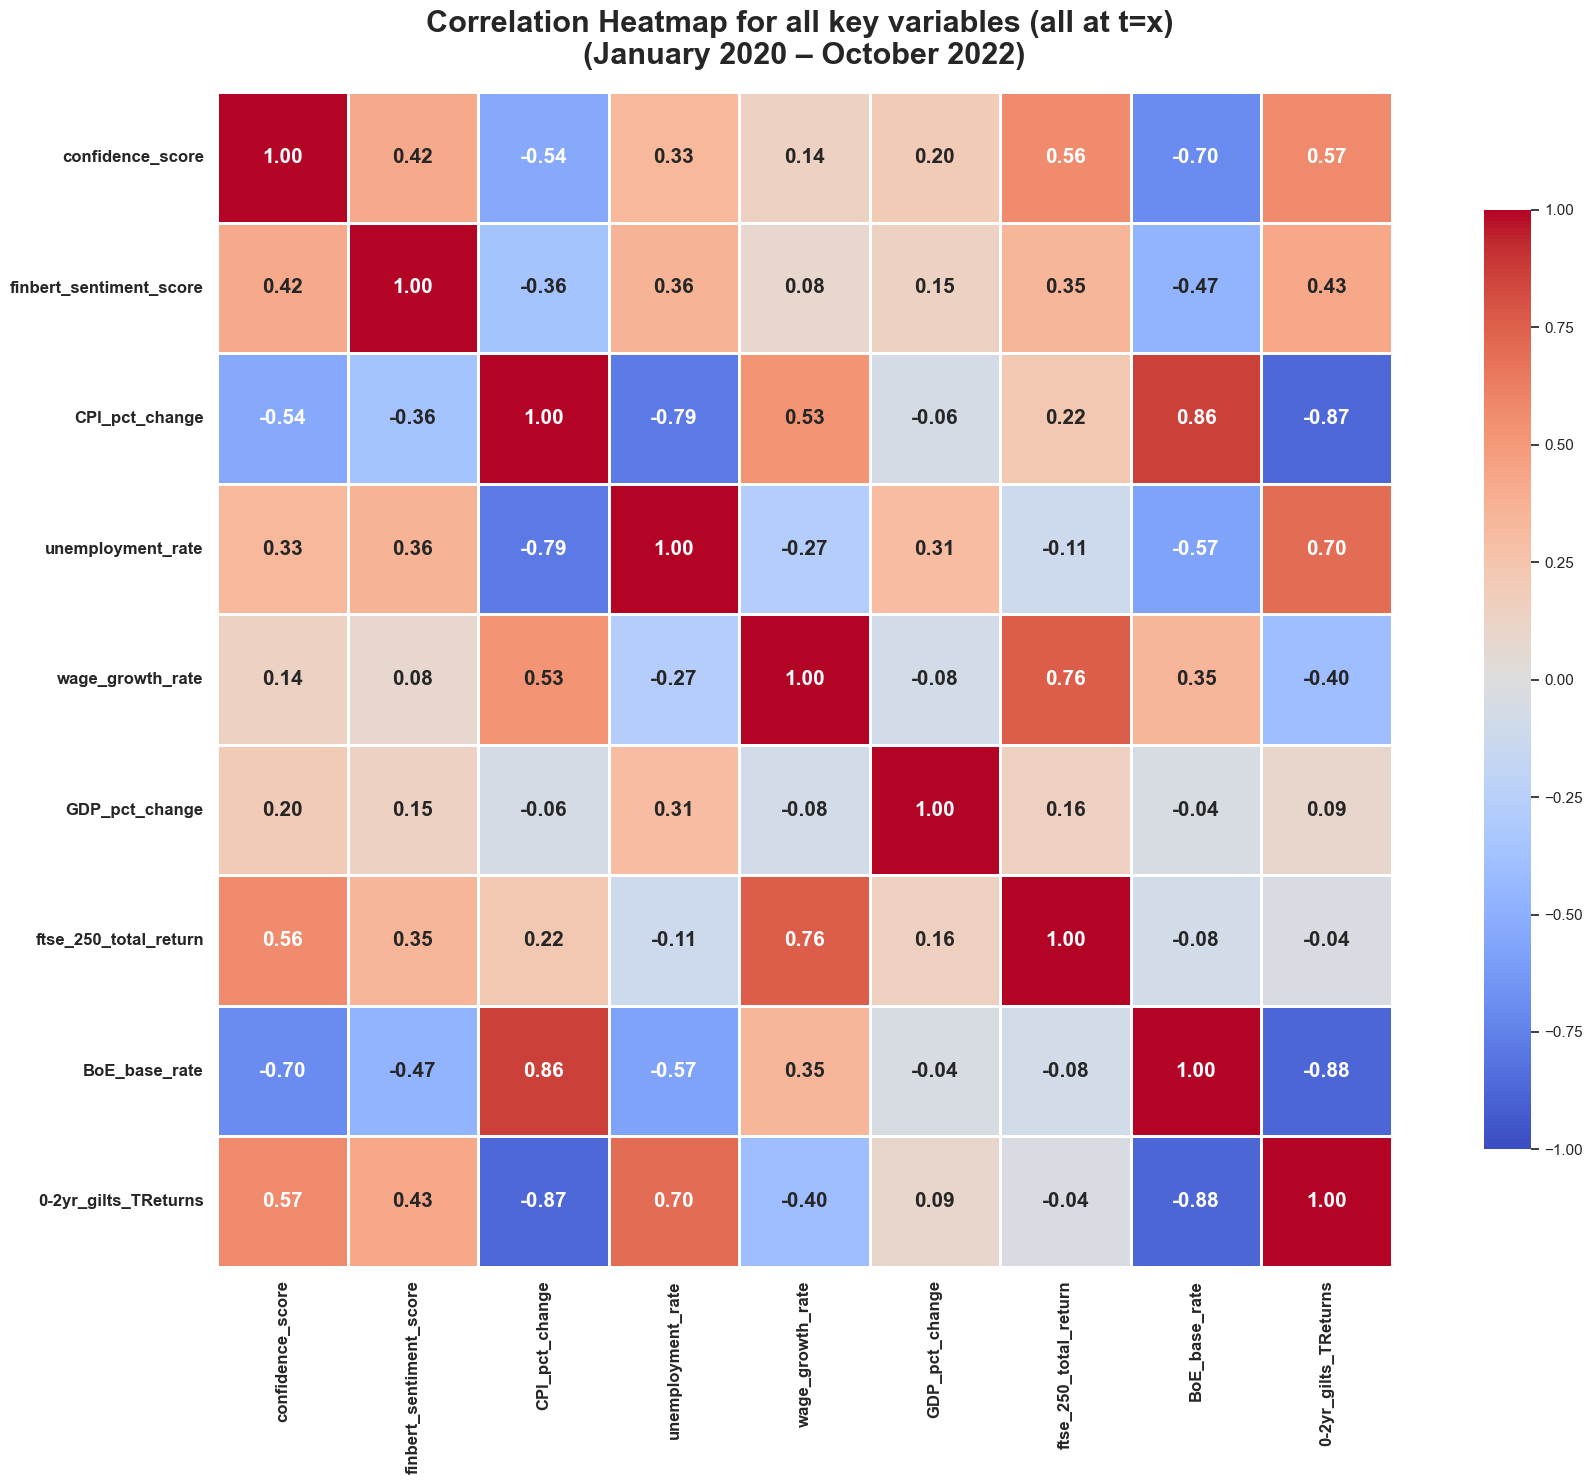

In [143]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]

# Select only numeric columns and drop rows with missing values
numeric_data = filtered_df.select_dtypes(include='number').dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap for all key variables (all at t=x) \n(January 2020 – October 2022)', 
          fontsize=22, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

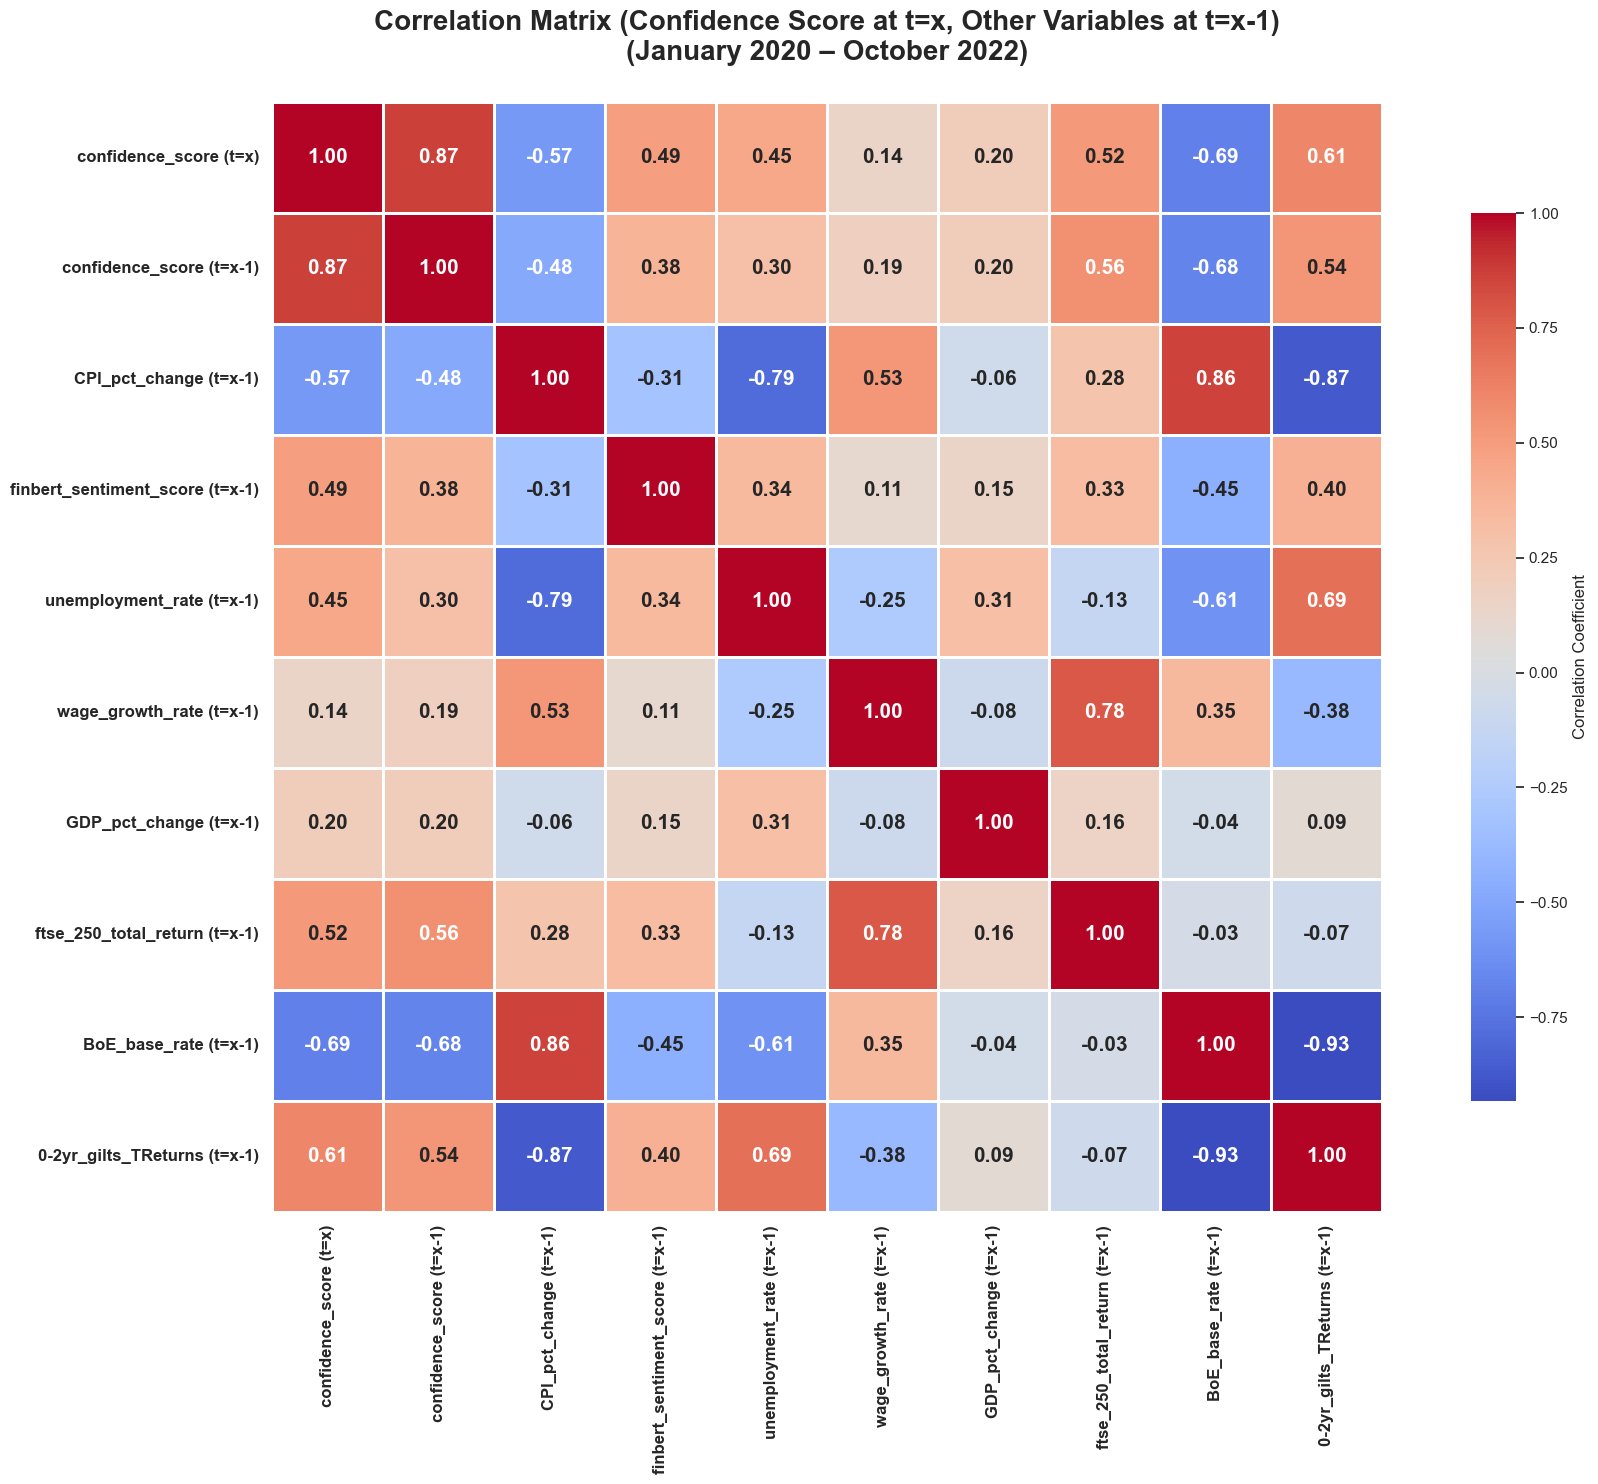

In [144]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns of interest
columns_of_interest = ['confidence_score',
    'CPI_pct_change', 'finbert_sentiment_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['confidence_score']].copy()
correlation_df.rename(columns={'confidence_score': 'confidence_score (t=x)'}, inplace=True)

# Add all other variables with a 1-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Confidence Score at t=x, Other Variables at t=x-1)\n(January 2020 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

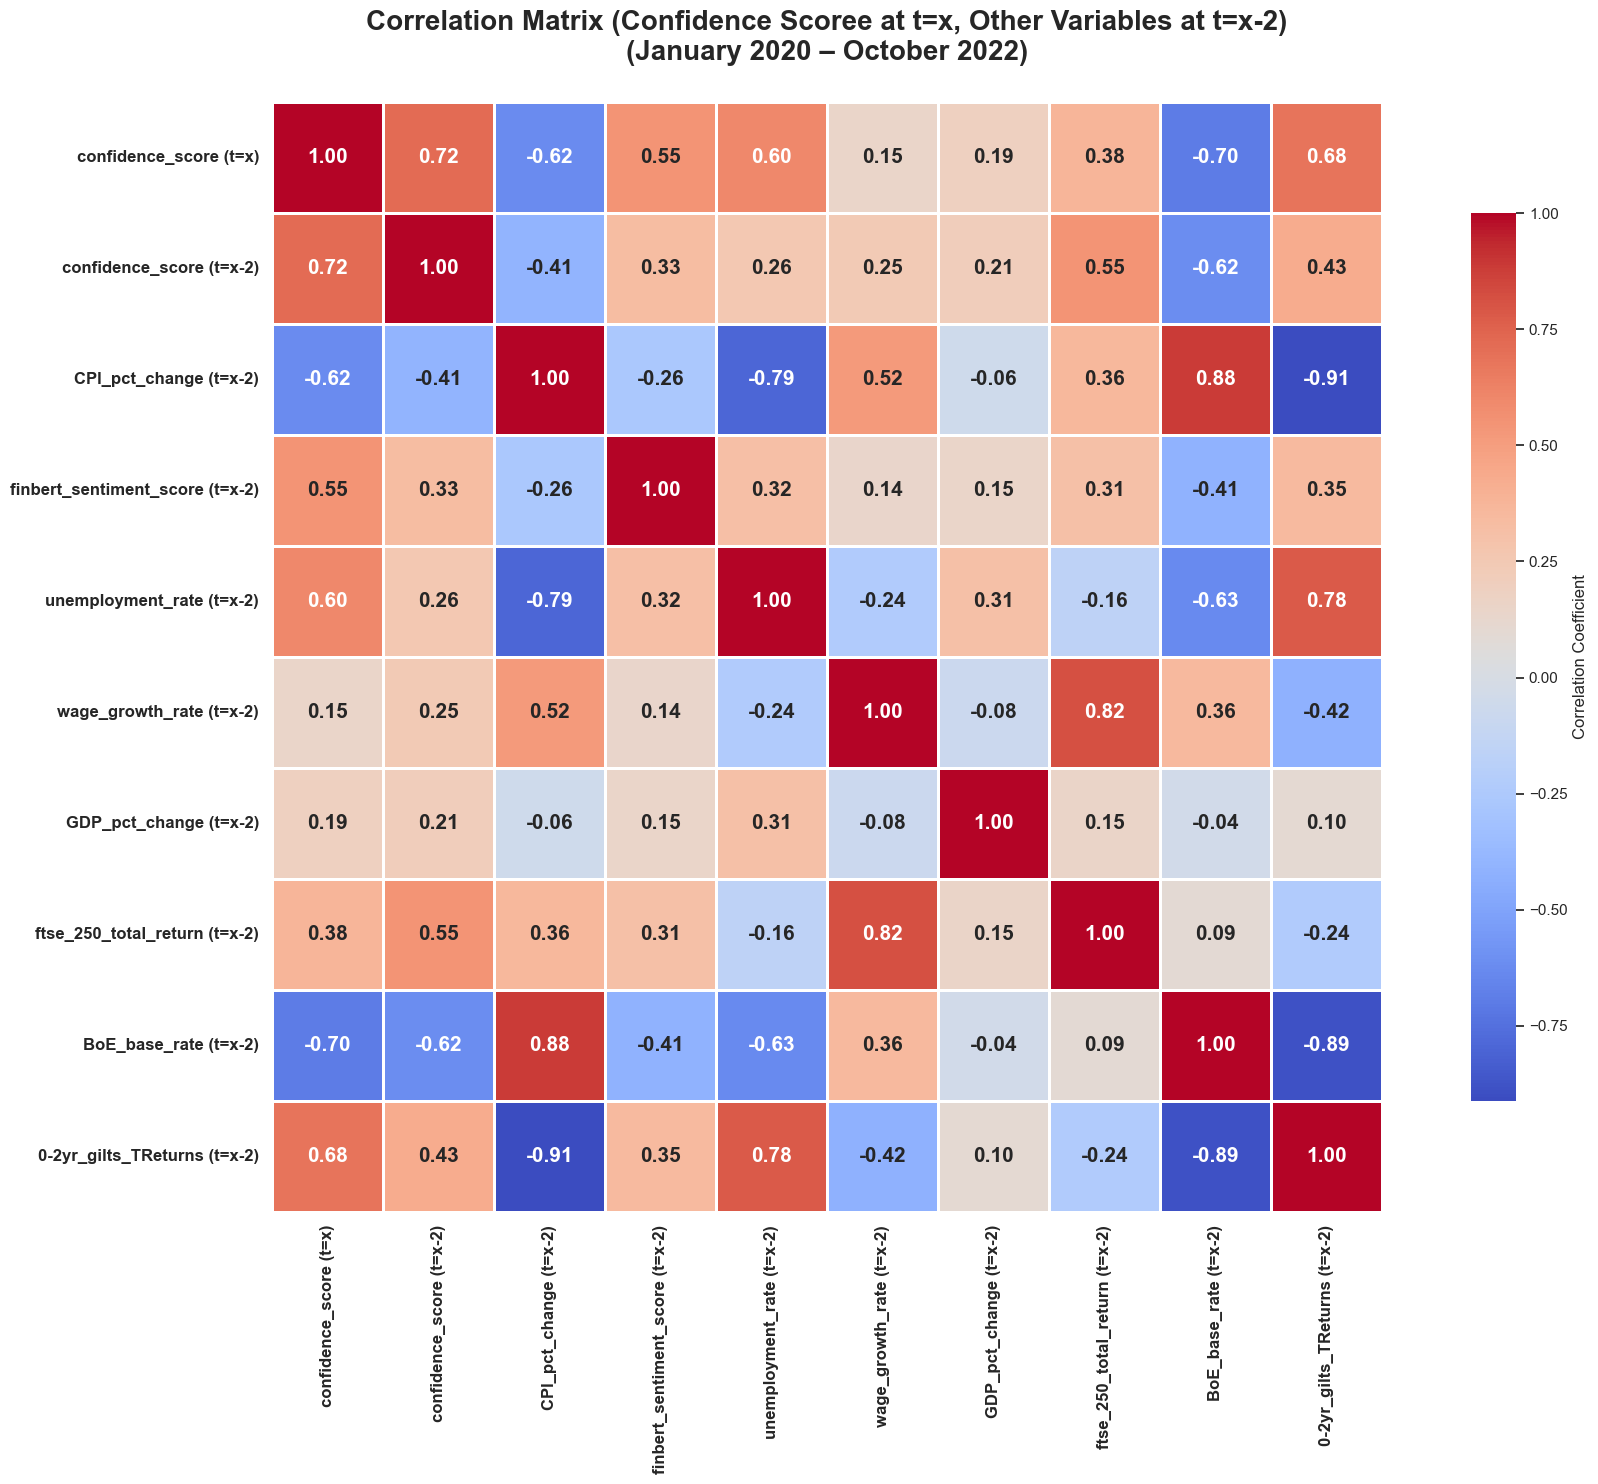

In [145]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns of interest
columns_of_interest = ['confidence_score',
    'CPI_pct_change', 'finbert_sentiment_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['confidence_score']].copy()
correlation_df.rename(columns={'confidence_score': 'confidence_score (t=x)'}, inplace=True)
# Add t+2 (2 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Confidence Scoree at t=x, Other Variables at t=x-2)\n(January 2020 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


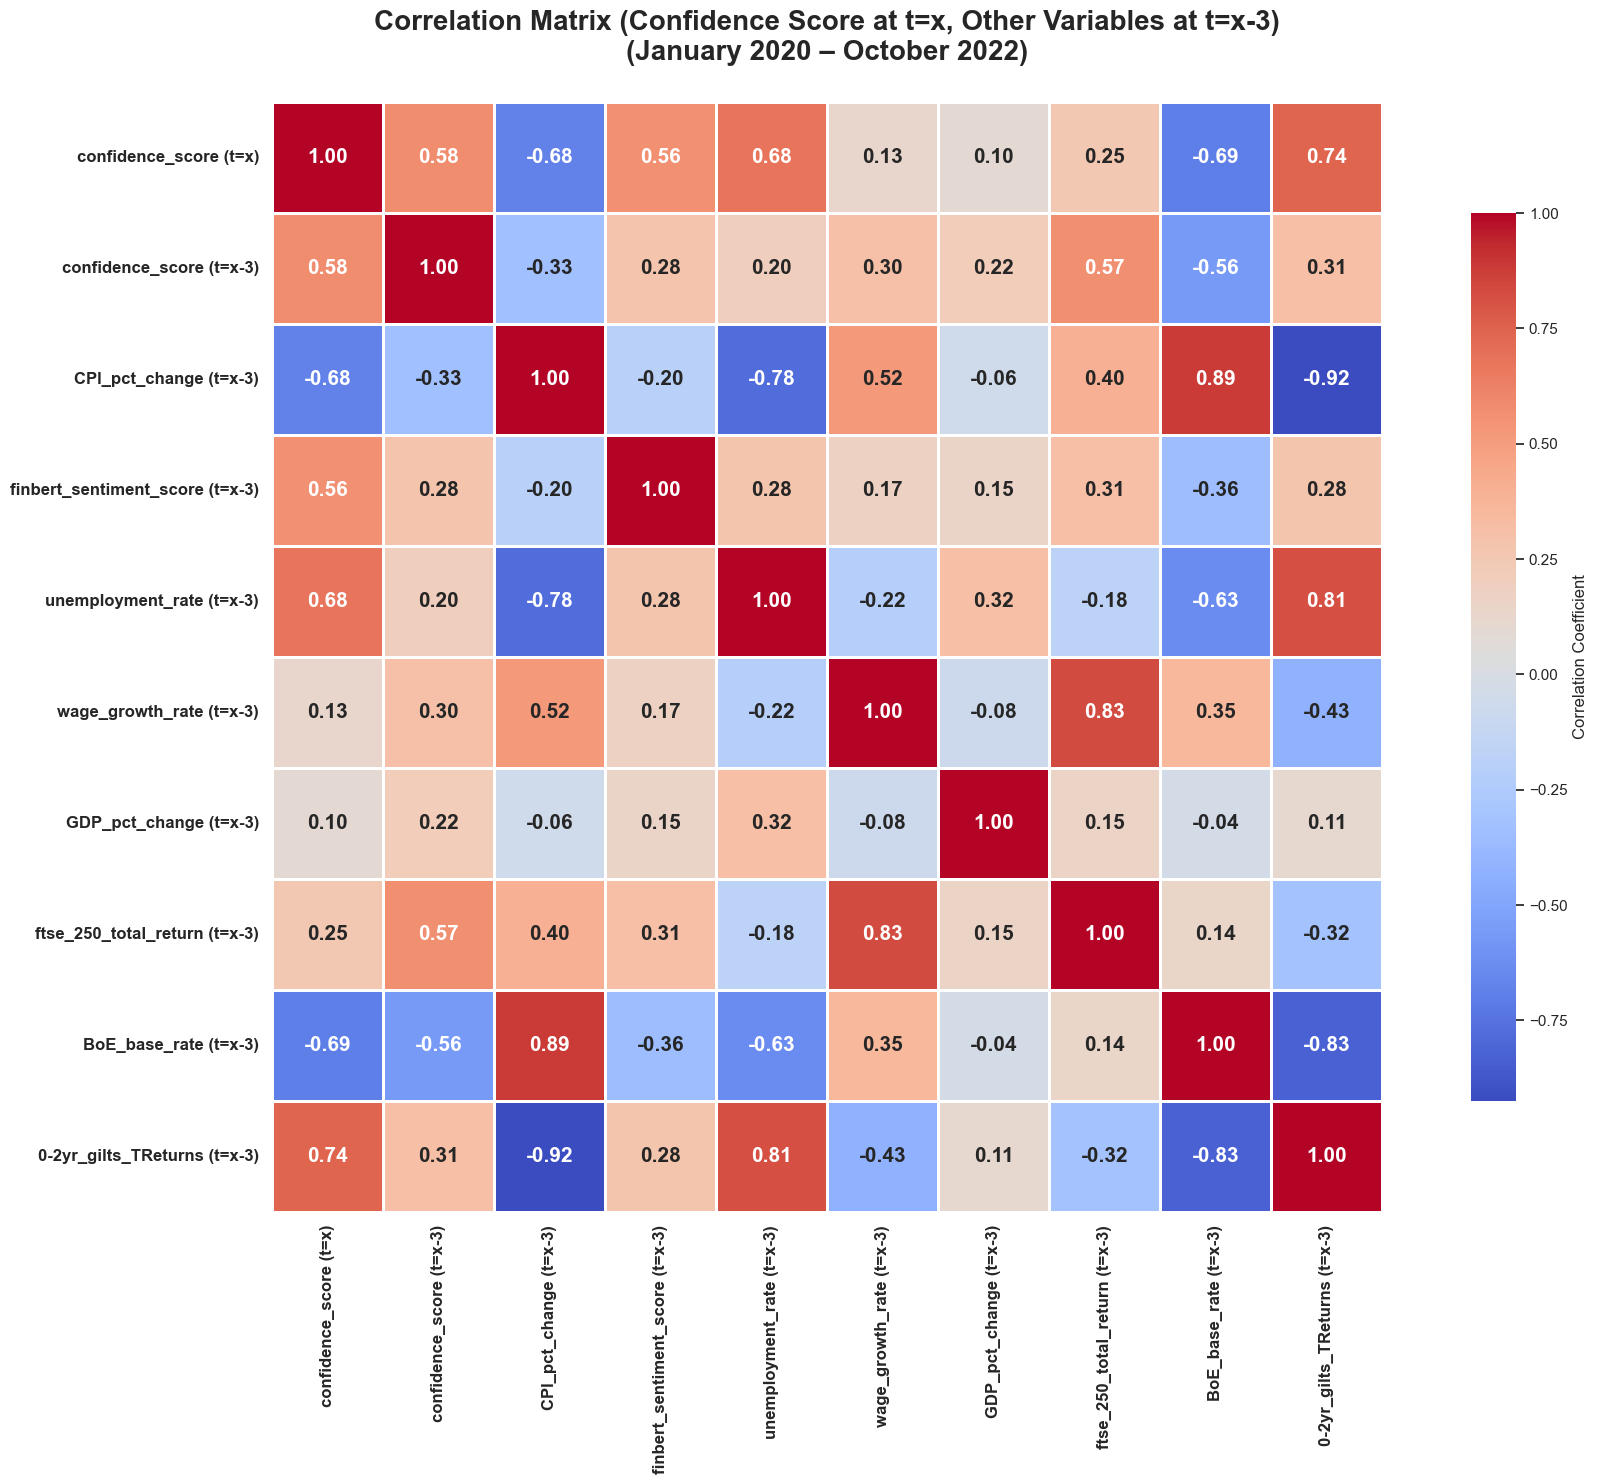

In [146]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns of interest
columns_of_interest = ['confidence_score',
    'CPI_pct_change', 'finbert_sentiment_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['confidence_score']].copy()
correlation_df.rename(columns={'confidence_score': 'confidence_score (t=x)'}, inplace=True)

# Add t+3 (3 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Confidence Score at t=x, Other Variables at t=x-3)\n(January 2020 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


#### The following four variables were chosen based on their strong correlations with consumer confidence between 2020 and 2022:CPI (% change):Shows a strong negative correlation (up to -0.68 at t-3), indicating that higher inflation is associated with lower consumer confidence.BoE Base Rate:Displays a consistent negative relationship, especially at t-2 (-0.70), suggesting that interest rate hikes reduce confidence with a short delay.0–2 Year Gilts Total Returns:Exhibits the strongest positive correlation (0.74 at t-3), implying that bond market performance reflects or influences consumer sentiment.Unemployment Rate:Moderately positively correlated (0.68 at t-3), suggesting that worsening labor conditions are linked to lower confidence levels.

### Prepare regression dataframe

In [164]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']

# Add required variables with specific time lags
regression_df['confidence_score (t=x)'] = filtered_df['confidence_score']
regression_df['confidence_score (t=x-1)'] = filtered_df['confidence_score'].shift(1)
regression_df['BoE_base_rate (t=x-1)'] = filtered_df['BoE_base_rate'].shift(1)
regression_df['ftse_250_total_return (t=x-1)'] = filtered_df['unemployment_rate'].shift(1)
regression_df['0-2yr_gilts_TReturns (t=x-1)'] = filtered_df['GDP_pct_change'].shift(1)
regression_df['CPI_pct_change (t=x-1)'] = filtered_df['CPI_pct_change'].shift(1)
# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation matrix
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)

,confidence_score (t=x),confidence_score (t=x-1),BoE_base_rate (t=x-1),ftse_250_total_return (t=x-1),0-2yr_gilts_TReturns (t=x-1),CPI_pct_change (t=x-1)
confidence_score (t=x),1.000000,0.870281,-0.694641,0.446576,0.203996,-0.574292
confidence_score (t=x-1),0.870281,1.000000,-0.675351,0.303672,0.203585,-0.482594
BoE_base_rate (t=x-1),-0.694641,-0.675351,1.000000,-0.605946,-0.042763,0.862602
ftse_250_total_return (t=x-1),0.446576,0.303672,-0.605946,1.000000,0.309503,-0.794856
0-2yr_gilts_TReturns (t=x-1),0.203996,0.203585,-0.042763,0.309503,1.000000,-0.060840
CPI_pct_change (t=x-1),-0.574292,-0.482594,0.862602,-0.794856,-0.060840,1.000000


In [166]:
# Define dependent variable
y = regression_df['confidence_score (t=x)']

# Define independent variables
X = regression_df[
    ['confidence_score (t=x-1)','BoE_base_rate (t=x-1)', 'ftse_250_total_return (t=x-1)',
     '0-2yr_gilts_TReturns (t=x-1)','CPI_pct_change (t=x-1)']
]

# Initialize and fit the model
mlr = LinearRegression()
mlr.fit(X, y)

# Print coefficients
coefficients = pd.Series(mlr.coef_, index=X.columns)
intercept = mlr.intercept_

print("Intercept:", intercept)
print("Coefficients:")
print(coefficients)

Intercept: -20.99311319773567
Coefficients:
confidence_score (t=x-1)         0.793832
BoE_base_rate (t=x-1)           -0.933454
ftse_250_total_return (t=x-1)    3.608687
0-2yr_gilts_TReturns (t=x-1)    -0.009025
CPI_pct_change (t=x-1)          -0.149293
dtype: float64


In [168]:
# Call the predictions for X (array).
mlr.predict(X)

array([-14.52793298, -12.17535373, -33.39185581, -32.49685255,
       -34.83689329, -26.96290323, -26.30421701, -26.30421701,
       -24.74464142, -22.34437326, -27.14055567, -28.31096675,
       -23.14147488, -25.46913864, -21.81939474, -16.74647335,
       -16.07541014, -11.76619861, -12.13957684, -10.84146926,
       -12.17865539, -16.49528174, -20.19903353, -17.95523634,
       -19.15083822, -23.17951328, -29.31839068, -33.63673706,
       -39.96969585, -41.32810158, -43.12001701, -43.45788585,
       -45.68201698, -49.78869732])

In [170]:
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))


R-squared:  0.7962058817791177
Intercept:  -20.99311319773567
Coefficients:


[('confidence_score (t=x-1)', 0.7938316631340275),
 ('BoE_base_rate (t=x-1)', -0.9334539204422825),
 ('ftse_250_total_return (t=x-1)', 3.6086866560317863),
 ('0-2yr_gilts_TReturns (t=x-1)', -0.009025277649231441),
 ('CPI_pct_change (t=x-1)', -0.14929336803947363)]

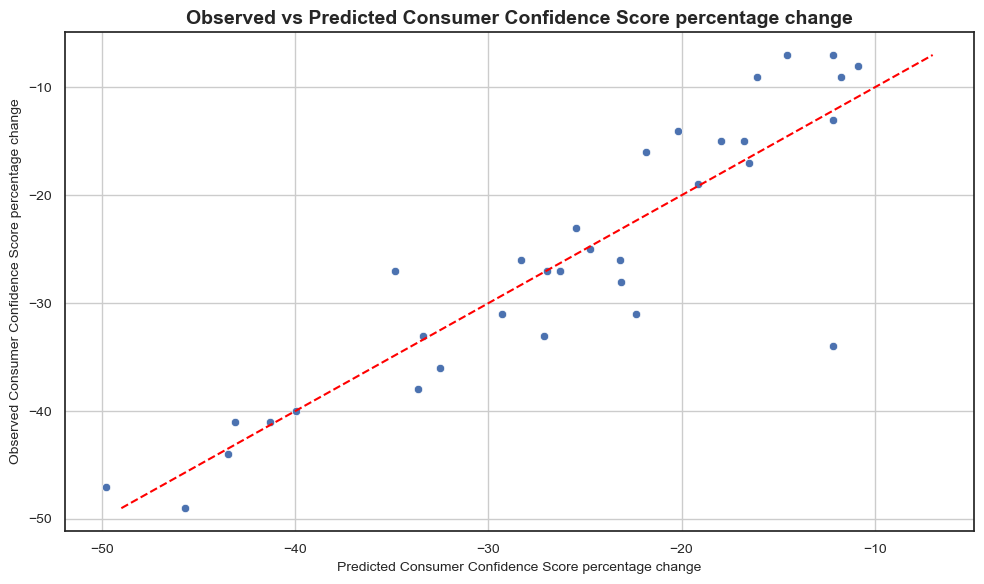

In [172]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['confidence_score (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted Consumer Confidence Score percentage change', fontsize=10)
plt.ylabel('Observed Consumer Confidence Score percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted Consumer Confidence Score percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

#### The scatter plot for the 2020–22 time frame shows a strong positive alignment between the predicted and observed consumer confidence scores. Most data points are clustered closely around the red dashed line (the ideal fit), indicating that the model performed well in capturing the pattern of confidence score changes during this period, despite some moderate deviations at the extremes.

### Training and testing subsets with MLR

In [176]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [178]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model)  

                              OLS Regression Results                              
Dep. Variable:     confidence_score (t=x)   R-squared:                       0.767
Model:                                OLS   Adj. R-squared:                  0.712
Method:                     Least Squares   F-statistic:                     13.85
Date:                    Mon, 19 May 2025   Prob (F-statistic):           4.75e-06
Time:                            02:17:13   Log-Likelihood:                -86.267
No. Observations:                      27   AIC:                             184.5
Df Residuals:                          21   BIC:                             192.3
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

#### The OLS regression model demonstrates a strong overall fit, with an R-squared of 0.767, indicating that approximately 77% of the variation in consumer confidence (t=x) is explained by the selected predictors. The most influential and statistically significant factor is the lagged confidence score (t=x-1), which shows a strong positive relationship (p < 0.001). All other variables align with expected economic theory in terms of direction, they are not individually significant at the 5% level. This suggests that their effects may be more subtle or interrelated, but they still contribute meaningfully to the model's explanatory power. Overall, past consumer sentiment remains the most reliable predictor of current confidence, with broader economic indicators offering additional context.

In [181]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [183]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [-23.52265857 -45.50074475 -22.74186935 -14.96295794 -34.56091596
 -16.5159557  -12.30976031 -26.73169054 -25.66981011 -28.45258902
 -12.74253552 -32.97876479 -42.23104135 -32.28223754 -40.16932932
 -17.55852293 -42.87359556 -19.85506397 -12.63401178 -22.60448882
 -26.07301438 -12.50335743 -50.2886449  -26.07301438 -27.23946191
 -22.26986666 -38.65409654]


In [185]:
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train))  

Prediction for test set: [-17.30615874 -11.49669785 -32.86378763 -28.47598342 -24.84577907
 -18.62391341 -16.59201993]


In [187]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

91.8976241649287


### Check for multicollinearity

In [190]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                       features
0       254.3                          const
1         2.2       confidence_score (t=x-1)
2         7.2          BoE_base_rate (t=x-1)
3         3.2  ftse_250_total_return (t=x-1)
4         1.4   0-2yr_gilts_TReturns (t=x-1)
5         8.3         CPI_pct_change (t=x-1)


#### The VIF results show that multicollinearity is generally not a serious concern in the model. Most variables have VIF values below 5, indicating low correlation with other predictors. CPI change at t=x-1 has the highest VIF at 8.3, and the BoE base rate also shows a moderate VIF of 7.2, suggesting some overlap with other variables, but both are still within acceptable limits. The constant has a very high VIF, which is normal and not problematic. Overall, the predictors appear to be sufficiently independent for reliable regression analysis.

### Check for heteroscedasticity

In [199]:
# Determine heteroscedasticity.
model2 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

In [197]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))


{'LM stat': 7.8200342801083265, 'LM Test p-value': 0.16643676828109544, 'F-stat': 1.712419326296923, 'F-test p-value': 0.17560220645472507}


#### The results of the Breusch-Pagan test indicate that there is no evidence of heteroskedasticity in the model. Both the LM test (p = 0.167) and the F-test (p = 0.176) have p-values well above the 0.05 threshold, meaning we fail to reject the null hypothesis of constant variance in the residuals. This suggests that the assumption of homoskedasticity holds, and the model's error terms have a stable variance, supporting the reliability of the regression results.

### Check normality of regression residuals - assumption of MLR

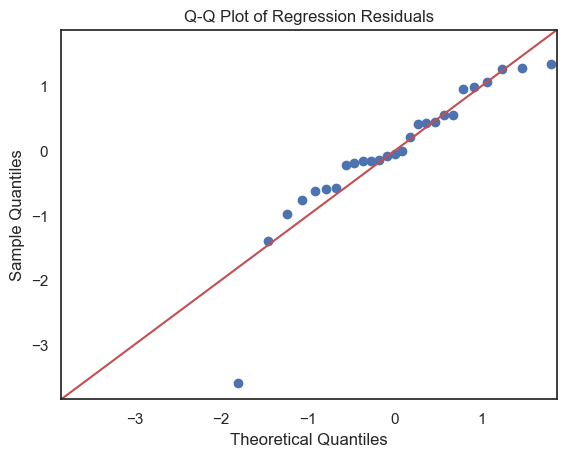

In [204]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

#### The Q-Q plot shows that the regression residuals closely follow the red diagonal line, which suggests that the residuals are approximately normally distributed. This supports the assumption of normality, indicating that the model’s errors behave as expected and the OLS estimates are reliable.

### Evaluate the model

In [208]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 2.0573390177963278
Mean Square Error (Final): 7.232610592367687


#### The model has a Mean Absolute Error (MAE) of approximately 2.05, meaning that, on average, the predictions are about 2.05 units away from the actual values. The Mean Squared Error (MSE) is 7.23, indicating low overall prediction error and suggesting the model performs well in fitting the data.

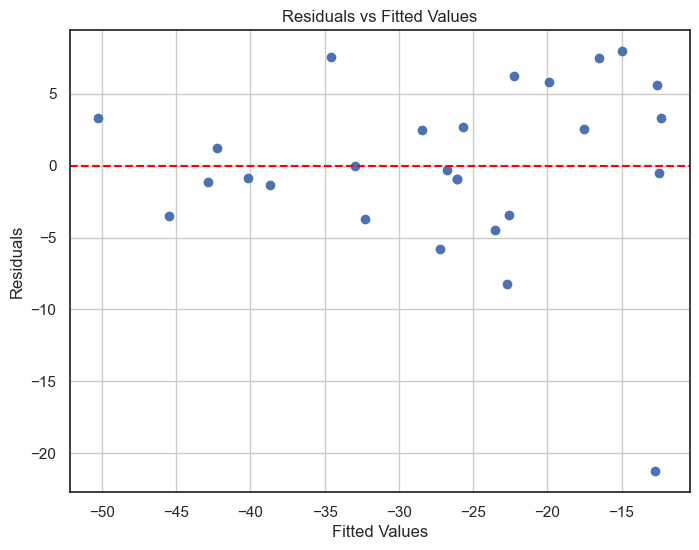

In [211]:
plt.figure(figsize=(8, 6))
plt.scatter(model1.fittedvalues, model1.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

#### The residuals vs. fitted values plot shows no clear pattern, with residuals scattered randomly around the zero line. This suggests that the model’s errors are evenly distributed and that the assumptions of linearity and homoscedasticity are likely met.

#### Drop all variables except for the lagged confidence score

### Re-perform MLR

In [218]:
# Define dependent variable
y = regression_df['confidence_score (t=x)']

# Define independent variables
X = regression_df[
    ['confidence_score (t=x-1)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [220]:
# Call the predictions for X (array).
mlr.predict(X)

array([-11.88382191, -10.10664175, -34.098574  , -33.20998392,
       -35.87575417, -27.87844341, -27.87844341, -27.87844341,
       -27.87844341, -26.10126325, -31.43280375, -33.20998392,
       -26.98985333, -28.7670335 , -24.32408308, -18.1039525 ,
       -17.21536241, -11.88382191, -11.88382191, -10.10664175,
       -10.99523183, -15.43818225, -18.99254258, -16.32677233,
       -17.21536241, -20.76972275, -26.98985333, -31.43280375,
       -37.65293433, -39.4301145 , -40.31870458, -40.31870458,
       -42.98447483, -47.42742525])

In [222]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))


R-squared:  0.7573886448868332
Intercept:  -3.886511160700085
Coefficients:


[('confidence_score (t=x-1)', 0.8885900834747894)]

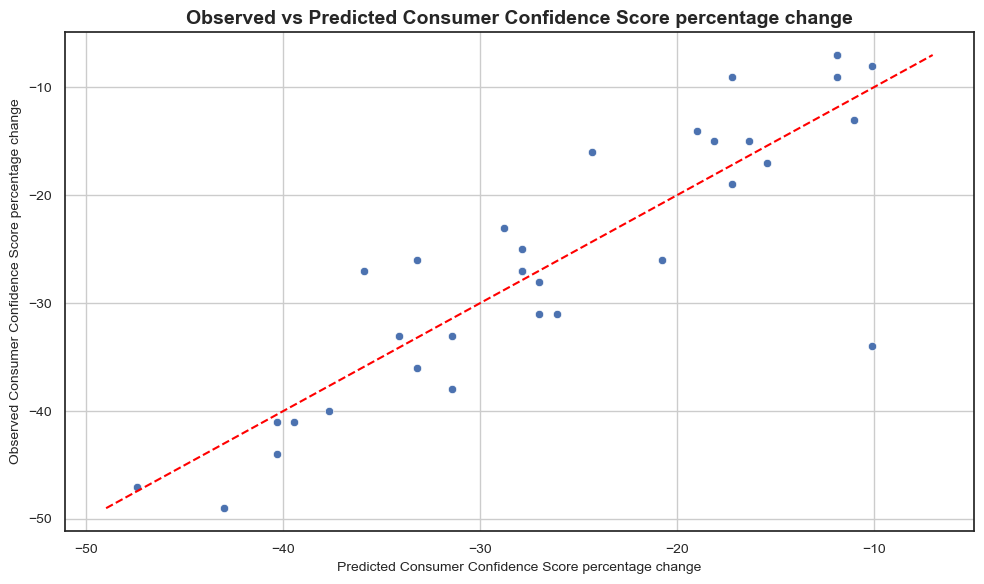

In [224]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['confidence_score (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted Consumer Confidence Score percentage change', fontsize=10)
plt.ylabel('Observed Consumer Confidence Score percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted Consumer Confidence Score percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

### Training and testing subsets with MLR

In [227]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [229]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  

                              OLS Regression Results                              
Dep. Variable:     confidence_score (t=x)   R-squared:                       0.733
Model:                                OLS   Adj. R-squared:                  0.722
Method:                     Least Squares   F-statistic:                     68.66
Date:                    Mon, 19 May 2025   Prob (F-statistic):           1.23e-08
Time:                            02:20:43   Log-Likelihood:                -88.121
No. Observations:                      27   AIC:                             180.2
Df Residuals:                          25   BIC:                             182.8
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [231]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                  features
0         5.8                     const
1         1.0  confidence_score (t=x-1)


In [233]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [235]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model4)))

{'LM stat': 2.8596913089415645, 'LM Test p-value': 0.09082492679435768, 'F-stat': 2.961531421925017, 'F-test p-value': 0.09762245477854739}


#### The simplified regression model, which includes only the lagged confidence score performs strongly overall. The model explains approximately 73.3% of the variation in the current confidence score (R-squared = 0.733), with the lagged confidence score being highly significant (p < 0.01). Multicollinearity is not a concern, as VIF values are very low (1.0 for both predictors). Additionally, the Breusch-Pagan test indicates no signs of heteroskedasticity (p > 0.48), and the residuals appear to meet the assumptions of normality and constant variance. Overall, the model is well-specified and statistically robust.

In [238]:
regression_df.describe()

,Date,confidence_score (t=x),confidence_score (t=x-1),BoE_base_rate (t=x-1),ftse_250_total_return (t=x-1),0-2yr_gilts_TReturns (t=x-1),CPI_pct_change (t=x-1)
count,34,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2021-05-22 08:28:14.117647104,-25.970588,-24.852941,0.457502,4.352941,1.094118,3.482353
min,2020-02-01 00:00:00,-49.000000,-49.000000,0.175000,3.600000,-20.300000,0.200000
25%,2020-09-08 12:00:00,-33.750000,-33.000000,0.200893,3.900000,0.100000,0.700000
50%,2021-05-16 12:00:00,-27.000000,-26.500000,0.226786,4.250000,0.700000,1.900000
75%,2022-01-24 06:00:00,-15.250000,-15.000000,0.343750,4.775000,1.700000,5.475000
max,2022-10-01 00:00:00,-7.000000,-7.000000,2.250000,5.300000,16.800000,10.100000
std,NaN,12.089277,11.840179,0.512804,0.519461,8.747534,3.407431


In [240]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 365 to 398
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           34 non-null     datetime64[ns]
 1   confidence_score (t=x)         34 non-null     float64       
 2   confidence_score (t=x-1)       34 non-null     float64       
 3   BoE_base_rate (t=x-1)          34 non-null     float64       
 4   ftse_250_total_return (t=x-1)  34 non-null     float64       
 5   0-2yr_gilts_TReturns (t=x-1)   34 non-null     float64       
 6   CPI_pct_change (t=x-1)         34 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.1 KB


In [242]:
regression_df.head()

,Date,confidence_score (t=x),confidence_score (t=x-1),BoE_base_rate (t=x-1),ftse_250_total_return (t=x-1),0-2yr_gilts_TReturns (t=x-1),CPI_pct_change (t=x-1)
365,2020-02-01,-7.0,-9.0,0.235526,3.9,-2.7,1.8
366,2020-03-01,-34.0,-7.0,0.205263,4.1,-2.7,1.7
367,2020-04-01,-33.0,-34.0,0.175000,4.1,-20.3,1.5
368,2020-05-01,-36.0,-33.0,0.178571,4.1,-20.3,0.8
369,2020-06-01,-27.0,-36.0,0.182143,4.1,-20.3,0.5


Root Mean Squared Error: 6.0517
Mean Squared Error: 36.6233
Mean Absolute Error: 4.1376
R² Score: 0.7535


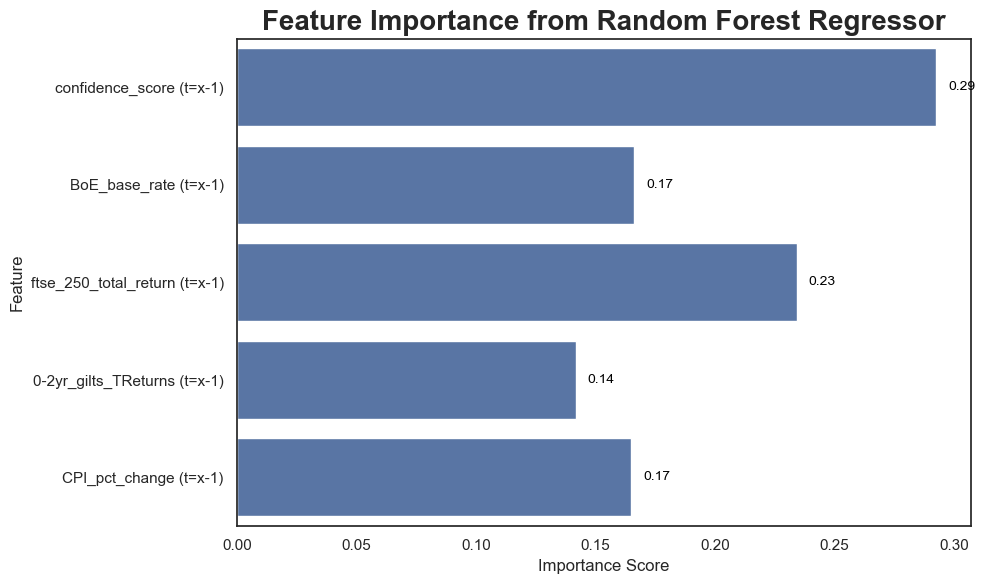

In [251]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas

# 1. Prepare the data
# -------------------
regression_df = regression_df.dropna(
    subset=['confidence_score (t=x)',
     'confidence_score (t=x-1)','BoE_base_rate (t=x-1)', 'ftse_250_total_return (t=x-1)',
     '0-2yr_gilts_TReturns (t=x-1)','CPI_pct_change (t=x-1)'
])
# Define dependent variable
y = regression_df['confidence_score (t=x)']

# Define independent variables
X = regression_df[
    [
'confidence_score (t=x-1)','BoE_base_rate (t=x-1)', 'ftse_250_total_return (t=x-1)',
     '0-2yr_gilts_TReturns (t=x-1)','CPI_pct_change (t=x-1)'
    ]
]

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Root Mean Squared Error: 7.2321
Mean Squared Error: 52.3037
Mean Absolute Error: 5.2956
R² Score: 0.6480


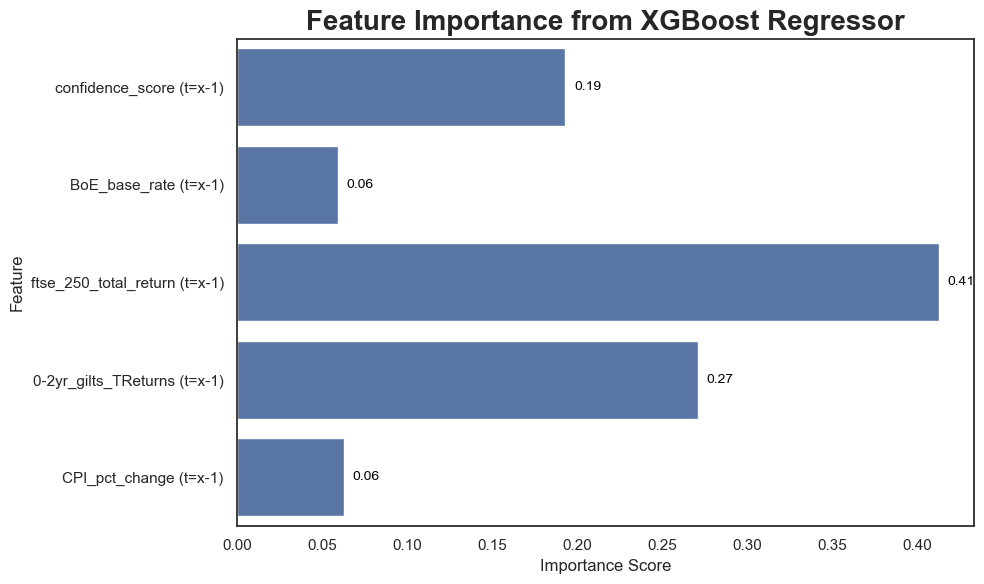

In [269]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data
# -------------------
regression_df = regression_df.dropna(
    subset=['confidence_score (t=x)',
     'confidence_score (t=x-1)','BoE_base_rate (t=x-1)', 'ftse_250_total_return (t=x-1)',
     '0-2yr_gilts_TReturns (t=x-1)','CPI_pct_change (t=x-1)'
])
# Define dependent variable
y = regression_df['confidence_score (t=x)']

# Define independent variables
X = regression_df[
    [
'confidence_score (t=x-1)','BoE_base_rate (t=x-1)', 'ftse_250_total_return (t=x-1)',
     '0-2yr_gilts_TReturns (t=x-1)','CPI_pct_change (t=x-1)'
    ]
]
# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',  # use squared error for regression
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

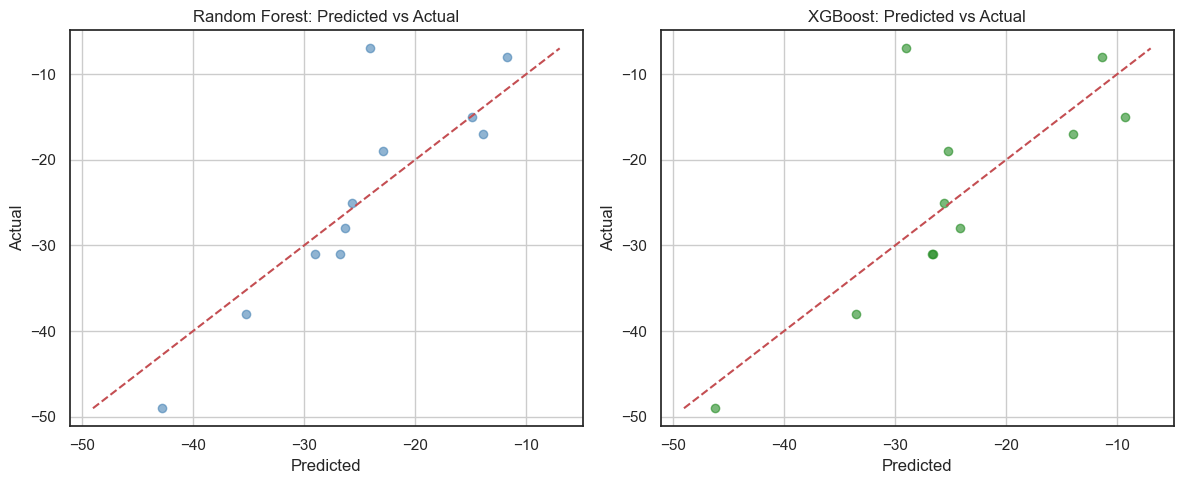

In [257]:
# --- Random Forest Predictions ---
rf_preds = rf_model.predict(X_test)

# --- XGBoost Predictions ---
xgb_preds = xgb_model.predict(X_test)

# --- Plot Predictions vs Actuals ---
plt.figure(figsize=(12, 5))

# Random Forest subplot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)

# XGBoost subplot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Both the Random Forest and XGBoost models demonstrate strong predictive performance, with R² scores of 0.7535 and 0.648 respectively. The predicted vs. actual plots show that both models closely follow the ideal diagonal line, with XGBoost slightly outperforming Random Forest in prediction accuracy. Overall, both models validate the significance of lagged confidence and key economic indicators in forecasting current confidence levels.